In [1]:
import numpy as np
from   numpy import ones, append, ones_like, zeros, newaxis, log, dot
from scipy.optimize import minimize, fmin_bfgs

from sklearn import linear_model
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook

In [2]:
data = np.loadtxt('ex2data2.txt', delimiter=',')

In [3]:
features = data[:,:2]
y = data[:,2]

print features.shape, y.shape

(118, 2) (118,)


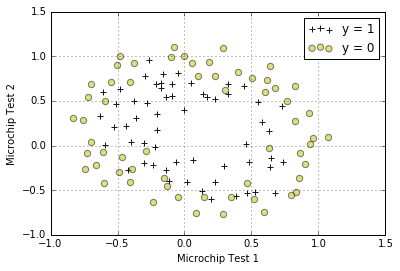

In [4]:
plt.scatter(features[y==1,0], features[y==1,1], marker='+', c='k', label='y = 1', alpha=0.9, s = 40)
plt.scatter(features[y==0,0], features[y==0,1], marker='o', c='y', label='y = 0', alpha=0.5, s = 40)
plt.grid()
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend()
plt.show()

# Part 1: Regularized Logistic Regression


In [5]:
# Adding intercept term


In [6]:
def map_feature(x1, x2):
    '''
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = append(out, r, axis=1)

    return out

# def map_feature(features, degree=6):
#     # out = ones(size(X1(:,1)));
#     out = ones_like(features[:,0:1])
    
#     for i in xrange(1, degree + 1):
#         for j in xrange(i+1):
            
#     print out

In [7]:
X = map_feature(features[:,0], features[:,1])
X.shape

(118, 28)

In [8]:
initial_theta = zeros((X.shape[1], 1))
initial_theta.shape

(28, 1)

In [9]:
regularization_parameter_lambda = 1

C= 1/regularization_parameter_lambda

In [10]:
def sigmoid(z): 
    return 1/(1+np.exp(-z))

In [11]:
def costFunctionReg(theta, X, y, rp_lambda):
    m, _ = X.shape
    h = sigmoid(X.dot(theta))
    
    # J = (1/m)   *   sum(-y .* log(A)- (1-y) .* log(1-A)  )  +   (lambda/(2*m)) * sum(theta(2:end) .^ 2);
    J = np.sum(-y[:, newaxis] * log(h) - 
                  (1-y[:, newaxis])*log(1-h))/m + (rp_lambda/(2*m)) * theta[1:].T.dot(theta[1:])
    return J

def gradientReg(theta, X, y, rp_lambda):
    m, _ = X.shape                
    # grr =   (1/m) * (  (sigmoid(X * theta) - y)' *  X );
    # grad =  grr' +   ((lambda/m) * [0; theta(2:end)]);
    h = sigmoid(dot(X, theta[:,newaxis]))
    theta_temp = theta.copy()
    theta_temp[0]=0
    p1 = dot(X.T,h-y[:, newaxis])/m
    p2 = (rp_lambda/m) * theta_temp[:,newaxis]
    grad = p1 + p2
    return grad.flatten()

print costFunctionReg(initial_theta, X, y, regularization_parameter_lambda)

[[ 0.69314718]]


In [12]:
res = minimize(fun=costFunctionReg, x0 =initial_theta, args=(X,y, 100), method='TNC', jac=gradientReg)
fmin_bfgs_res = fmin_bfgs(f=costFunctionReg, x0 =initial_theta, args=(X,y, 0.1), maxiter=400)#
#print res.x
print fmin_bfgs_res
costFunctionReg(res.x, X, y, 1), costFunctionReg(fmin_bfgs_res, X, y, 1)

Optimization terminated successfully.
         Current function value: 81.774417
         Iterations: 19
         Function evaluations: 720
         Gradient evaluations: 24
[ -3.38533435e-02   7.71798632e-05   4.85487711e-05  -2.76452719e-04
   2.00139142e-06  -3.06408415e-04  -7.76791887e-05  -1.26876732e-04
  -3.69938149e-04  -2.49036403e-05   4.29263735e-04   1.15380798e-04
   4.35855227e-04   3.43044533e-05   5.56410092e-04  -6.52471511e-05
  -1.13672933e-04   3.40933908e-05  -5.87299666e-05   7.54168627e-05
  -2.28115235e-04  -1.31667600e-04   2.76221023e-05   2.17641784e-04
   4.89811094e-05  -1.82202113e-05   2.21517329e-04  -9.33708771e-05]


(81.791304607993112, 81.77441734683805)

In [13]:
logreg1 = linear_model.LogisticRegression(C=1)
logreg2 = linear_model.LogisticRegression(C=1e5)

In [14]:
logreg1.fit(X, y)
logreg2.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 The idea is simple to plot the non-linear decision boundry by computing the classifier's predictions on an evenly spaced grid and then drew a contour plot of where the predictions change from y=0 to y=1.
---

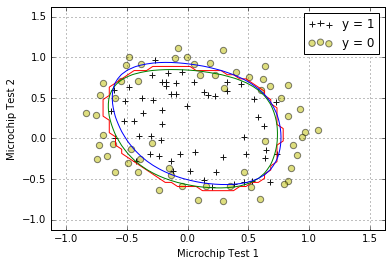

In [15]:
# https://www.kunxi.org/notes/Machine_Learning/Logistic_Regression/



plt.scatter(features[y==1,0], features[y==1,1], marker='+', c='k', label='y = 1', alpha=0.9, s = 40)
plt.scatter(features[y==0,0], features[y==0,1], marker='o', c='y', label='y = 0', alpha=0.5, s = 40)
plt.grid()

dim = np.linspace(-1, 1.5, 50)
dx, dy = np.meshgrid(dim, dim)

# Another way
# # Plot the decision boundary. For that, we will assign a color to each
# # point in the mesh [x_min, m_max]x[y_min, y_max].
# x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
# y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

v = map_feature(dx.flatten(), dy.flatten())



z = logreg1.predict(v)
z2 = np.dot(logreg1.coef_, v.T) + logreg1.intercept_
z3 = v.dot(res.x[:,newaxis])
z4 = v.dot(fmin_bfgs_res[:,newaxis])

z = z.reshape(dx.shape)
z2 = z2.reshape(dx.shape)
z3 = z3.reshape(dx.shape)
z4 = z4.reshape(dx.shape)

CS = plt.contour(dx, dy, z, levels=[0], colors=['r'], label='decision boundry')
CS = plt.contour(dx, dy, z2, levels=[0], colors=['g'], label='decision boundry')
CS = plt.contour(dx, dy, z3, levels=[0], colors=['b'], label='decision boundry')
CS = plt.contour(dx, dy, z4, levels=[0], colors=['b'], label='decision boundry')
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend()
plt.show()